### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [303]:
data = pd.read_csv('coupons.csv')

In [305]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration           

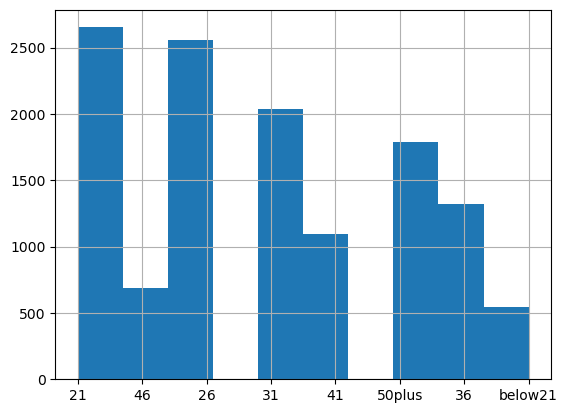

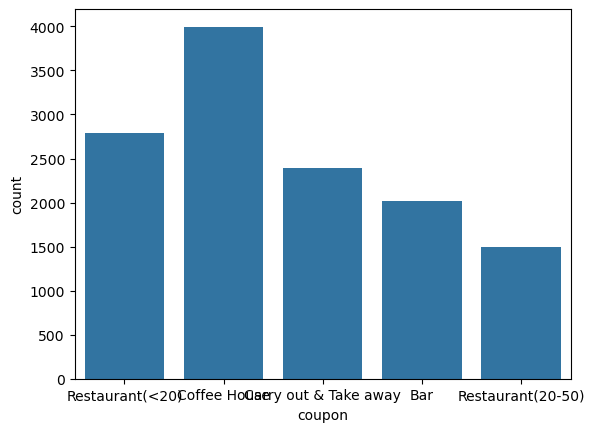

In [307]:
#check for nulls
print(data.isnull().sum())
# check for data types
print(data.dtypes)
#lets see what the data tells us
data.describe()
data['age'].hist()
plt.show()
sns.countplot(x='coupon', data=data)
plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [309]:

data['car'].dropna() #dropping nulls since this data affect the outcome
data['Bar'].fillna(0) #entering 0 which has neutral impact on the distrubution and does not skew the distribution
data['CoffeeHouse'].fillna("never") #entering never which has minimal skew impact on the distrubution and is a conservative approach
data['CarryAway'].fillna("1~3") #entering 1~3 which has minimal skew impact on the distrubution and is a conservative approach
data['RestaurantLessThan20'].fillna("1~3") #entering 1~3 which has minimal skew impact on the distrubution and is a conservative approach
data['Restaurant20To50'].fillna("1~3") #entering 1~3 which has minimal skew impact on the distrubution and is a conservative approach


0        1~3
1        1~3
2        1~3
3        1~3
4        1~3
        ... 
12679    1~3
12680    1~3
12681    1~3
12682    1~3
12683    1~3
Name: Restaurant20To50, Length: 12684, dtype: object

4. What proportion of the total observations chose to accept the coupon?



In [73]:
acceptance_rate = data['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

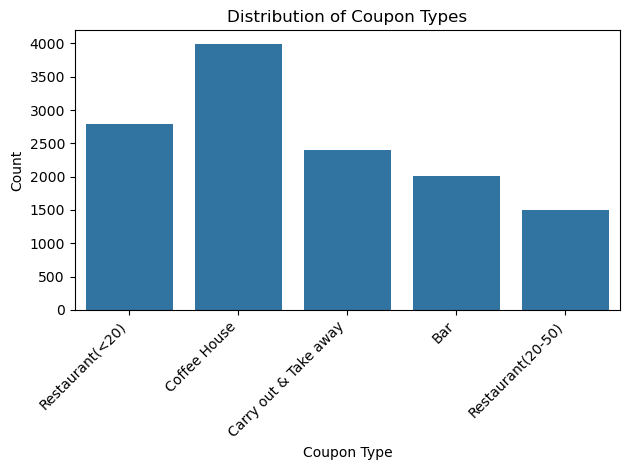

In [165]:
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

6. Use a histogram to visualize the temperature column.

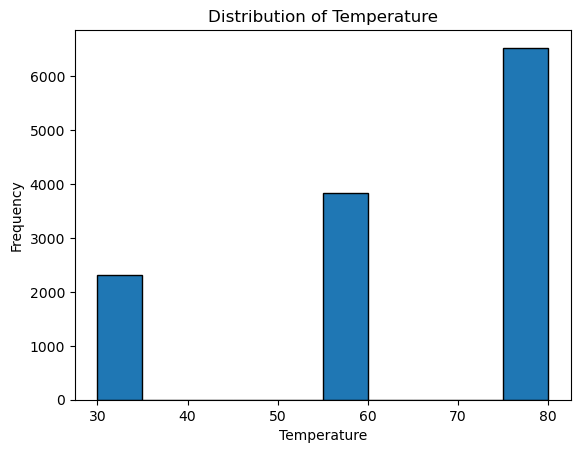

In [167]:
plt.hist(data['temperature'], bins=10, edgecolor='black')  
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

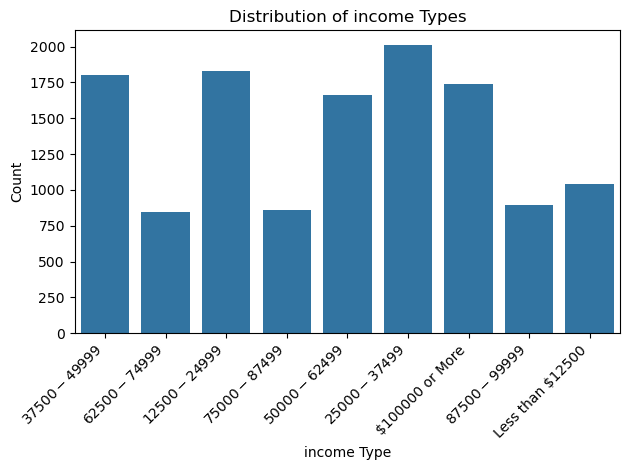

In [221]:
sns.countplot(x='income', data=data)
plt.title('Distribution of income Types')
plt.xlabel('income Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

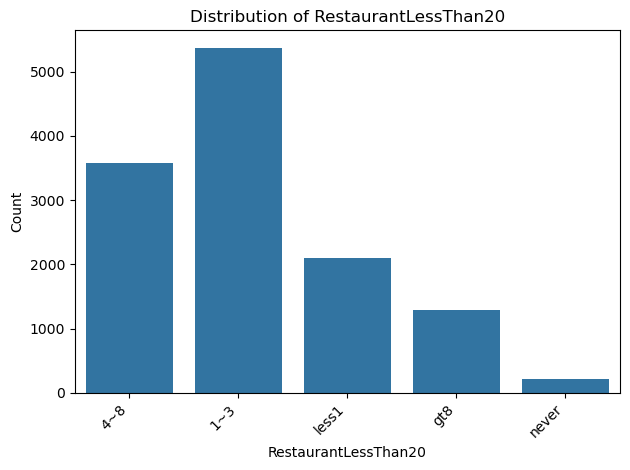

In [231]:
sns.countplot(x='RestaurantLessThan20', data=data)
plt.title('Distribution of RestaurantLessThan20')
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [311]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [313]:
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [315]:


# Mapping string values to numeric values
mapping = {
    'never': '0',
    'less1': '1',
    '1~3': '3',
    '4~8': '4',
    'gt8': '8'
    }


# Replacing and converting to float
bar_coupons['Bar'] = bar_coupons['Bar'].replace(mapping).astype(float)


# Apply conditions on bar visit frequency
less_frequent = bar_coupons[bar_coupons['Bar'] <= 3]  
more_frequent = bar_coupons[bar_coupons['Bar'] > 3]  

# Calculating acceptance rates 
acceptance_rate_less_frequent = less_frequent['Y'].mean()
acceptance_rate_more_frequent = more_frequent['Y'].mean()

# Print results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_frequent:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_frequent:.2f}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37
Acceptance rate for those who went to a bar more than 3 times a month: 0.77


C:\Users\marig\AppData\Local\Temp\ipykernel_31708\3727167196.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Bar'] = bar_coupons['Bar'].replace(mapping).astype(float)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [317]:
# Mapping of string values
age_mapping = {
    '50plus': '50',
    'below21': '21',
    }


# Replacing and converting to integer
bar_coupons['age'] = bar_coupons['age'].replace(age_mapping).astype(int)
pd.to_numeric(bar_coupons['age'])

# Applying condition as boolean mask for the target group
target_group_mask = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)

# Creating new groups
target_group = bar_coupons[target_group_mask]
other_group = bar_coupons[~target_group_mask]  # ~ negates the mask

# Calculating acceptance rates
target_group_acceptance_rate = target_group['Y'].mean()
other_group_acceptance_rate = other_group['Y'].mean()

# Print results
print(f"Acceptance rate for target group: {target_group_acceptance_rate:.2f}")
print(f"Acceptance rate for all others: {other_group_acceptance_rate:.2f}")

# Check for difference
print(f"Is there a difference? {target_group_acceptance_rate != other_group_acceptance_rate}")

Acceptance rate for target group: 0.70
Acceptance rate for all others: 0.34
Is there a difference? True


C:\Users\marig\AppData\Local\Temp\ipykernel_31708\1764249257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['age'] = bar_coupons['age'].replace(age_mapping).astype(int)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [209]:
# Apply condition as a boolean mask for the target group
target_group_mask = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))

# Creating new groups
target_group = bar_coupons[target_group_mask]
other_group = bar_coupons[~target_group_mask] 

# Calculating acceptance rates
target_group_acceptance_rate = target_group['Y'].mean()
other_group_acceptance_rate = other_group['Y'].mean()

# Print results
print(f"Acceptance rate for target group: {target_group_acceptance_rate:.2f}")
print(f"Acceptance rate for all others: {other_group_acceptance_rate:.2f}")

# Check for difference
print(f"Is there a difference? {target_group_acceptance_rate != other_group_acceptance_rate}")

Acceptance rate for target group: 0.71
Acceptance rate for all others: 0.30
Is there a difference? True


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [319]:
# Mapping of string values 
income_mapping = {
    '$50000 - $62499': '62499',
    '$12500 - $24999': '24999',
    '$75000 - $87499': '87499',
    '$62500 - $74999': '74999',
    '$37500 - $49999': '49999',
    '$25000 - $37499': '37499',
    '$100000 or More': '100000',
    '$87500 - $99999': '99999',
    'Less than $12500': '12500'
    }


# Replacing and converting to integer
bar_coupons['income'] = bar_coupons['income'].replace(income_mapping).astype(int)

Rest_under20_mapping = {
    'never': '0',
    'less1': '1',
    '1~3': '3',
    '4~8': '4',
    'gt8': '8'
    }
# Replacing and converting to float
bar_coupons['RestaurantLessThan20'] = bar_coupons['RestaurantLessThan20'].replace(Rest_under20_mapping).astype(float)


# Apply conditions as boolean masks

condition1 = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')
condition2 = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] <= 30) 
condition3 = (bar_coupons['RestaurantLessThan20'] >= 4) & (bar_coupons['income'] < 50000)

# Combine conditions 
target_group_mask = condition1 | condition2 | condition3

# Creating new groups
target_group = bar_coupons[target_group_mask]
other_group = bar_coupons[~target_group_mask]

# Calculating acceptance rates
target_group_acceptance_rate = target_group['Y'].mean()
other_group_acceptance_rate = other_group['Y'].mean()

# Print results
print(f"Acceptance rate for target group: {target_group_acceptance_rate:.2f}")
print(f"Acceptance rate for all others: {other_group_acceptance_rate:.2f}")

# Check for difference
print(f"Is there a difference? {target_group_acceptance_rate != other_group_acceptance_rate}")

Acceptance rate for target group: 0.59
Acceptance rate for all others: 0.30
Is there a difference? True


C:\Users\marig\AppData\Local\Temp\ipykernel_31708\3357270001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['income'] = bar_coupons['income'].replace(income_mapping).astype(int)
C:\Users\marig\AppData\Local\Temp\ipykernel_31708\3357270001.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['RestaurantLessThan20'] = bar_coupons['RestaurantLessThan20'].replace(Rest_under20_mapping).astype(float)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [330]:
print(f"Drivers who visit bars more than once a month are more inclined to accept bar coupons compared to those who visit less frequently. Drivers with passengers with friends and partners, and widowed are more likely to accept bar coupons. Younger drivers and those who go to inexpensive restaurants and lower income are likely to accept bar coupons.")



Drivers who visit bars more than once a month are more inclined to accept bar coupons compared to those who visit less frequently. Drivers with passengers with friends and partners, and widowed are more likely to accept bar coupons. Younger drivers and those who go to inexpensive restaurants and lower income are likely to accept bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [261]:
coffeehouse_coupons = data[data['coupon'] == 'Coffee House']
coffeehouse_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [263]:
cf_acceptance_rate = coffeehouse_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {cf_acceptance_rate:.2f}")

Proportion of bar coupons accepted: 0.50


In [267]:

# Mapping of string values to numeric values
cf_mapping = {
    'never': '0',
    'less1': '1',
    '1~3': '3',
    '4~8': '4',
    'gt8': '8'
    }


# Replacing and converting to float
coffeehouse_coupons['CoffeeHouse'] = coffeehouse_coupons['CoffeeHouse'].replace(cf_mapping).astype(float)


# Creating new groups based on bar visit frequency
less_frequent = coffeehouse_coupons[coffeehouse_coupons['CoffeeHouse'] <= 3]  
more_frequent = coffeehouse_coupons[coffeehouse_coupons['CoffeeHouse'] > 3]  

# Calculating acceptance rates for each group
acceptance_rate_less_frequent = less_frequent['Y'].mean()
acceptance_rate_more_frequent = more_frequent['Y'].mean()

# Print results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_frequent:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_frequent:.2f}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.45
Acceptance rate for those who went to a bar more than 3 times a month: 0.68


C:\Users\marig\AppData\Local\Temp\ipykernel_31708\1601337.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse_coupons['CoffeeHouse'] = coffeehouse_coupons['CoffeeHouse'].replace(cf_mapping).astype(float)


In [273]:
# Mapping of string values to numeric values
age_mapping = {
    '50plus': '50',
    'below21': '21',
    }


# Replacing and converting to integer
coffeehouse_coupons['age'] = coffeehouse_coupons['age'].replace(age_mapping).astype(int)
pd.to_numeric(coffeehouse_coupons['age'])

# Creating a boolean mask for the target group
target_group_mask = (coffeehouse_coupons['CoffeeHouse'] > 1) & (coffeehouse_coupons['age'] > 25)

# Creating new groups
target_group = coffeehouse_coupons[target_group_mask]
other_group = coffeehouse_coupons[~target_group_mask]  # ~ negates the mask

# Calculating acceptance rates
target_group_acceptance_rate = target_group['Y'].mean()
other_group_acceptance_rate = other_group['Y'].mean()

# Print results
print(f"Acceptance rate for target group: {target_group_acceptance_rate:.2f}")
print(f"Acceptance rate for all others: {other_group_acceptance_rate:.2f}")

# Check for difference
print(f"Is there a difference? {target_group_acceptance_rate != other_group_acceptance_rate}")

Acceptance rate for target group: 0.64
Acceptance rate for all others: 0.43
Is there a difference? True


C:\Users\marig\AppData\Local\Temp\ipykernel_31708\769249291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse_coupons['age'] = coffeehouse_coupons['age'].replace(age_mapping).astype(int)


In [277]:
# Creating a boolean mask for the target group
target_group_mask = (coffeehouse_coupons['CoffeeHouse'] > 1) & (coffeehouse_coupons['passanger'] != 'Friend(s)') & (~coffeehouse_coupons['occupation'].isin(['Education&Training&Library']))

# Creating new groups
target_group = coffeehouse_coupons[target_group_mask]
other_group = coffeehouse_coupons[~target_group_mask] 

# Calculating acceptance rates
target_group_acceptance_rate = target_group['Y'].mean()
other_group_acceptance_rate = other_group['Y'].mean()

# Print results
print(f"Acceptance rate for target group: {target_group_acceptance_rate:.2f}")
print(f"Acceptance rate for all others: {other_group_acceptance_rate:.2f}")

# Check for difference
print(f"Is there a difference? {target_group_acceptance_rate != other_group_acceptance_rate}")

Acceptance rate for target group: 0.63
Acceptance rate for all others: 0.44
Is there a difference? True


In [299]:
# Mapping of string values to numeric values
income_mapping = {
    '$50000 - $62499': '62499',
    '$12500 - $24999': '24999',
    '$75000 - $87499': '87499',
    '$62500 - $74999': '74999',
    '$37500 - $49999': '49999',
    '$25000 - $37499': '37499',
    '$100000 or More': '100000',
    '$87500 - $99999': '99999',
    'Less than $12500': '12500'
    }


# Replacing and converting to integer
coffeehouse_coupons['income'] = coffeehouse_coupons['income'].replace(income_mapping).astype(int)

Rest_under20_mapping = {
    'never': '0',
    'less1': '1',
    '1~3': '3',
    '4~8': '4',
    'gt8': '8'
    }
# Replacing and converting to float
coffeehouse_coupons['RestaurantLessThan20'] = coffeehouse_coupons['RestaurantLessThan20'].replace(Rest_under20_mapping).astype(float)


# Applying conditions as boolean masks 

condition1 = (coffeehouse_coupons['CoffeeHouse'] > 1) & (coffeehouse_coupons['passanger'] != 'Friend(s)') & (coffeehouse_coupons['gender'] == 'Female')
condition2 = (coffeehouse_coupons['CoffeeHouse'] > 1) & (coffeehouse_coupons['age'] <= 30) 
condition3 = (coffeehouse_coupons['RestaurantLessThan20'] >= 3) & (coffeehouse_coupons['income'] < 50000)

# Combine conditions 
target_group_mask = condition1 | condition2 | condition3

# Creating new groups
target_group = coffeehouse_coupons[target_group_mask]
other_group = coffeehouse_coupons[~target_group_mask]

# Calculating acceptance rates
target_group_acceptance_rate = target_group['Y'].mean()
other_group_acceptance_rate = other_group['Y'].mean()

# Print results
print(f"Acceptance rate for target group: {target_group_acceptance_rate:.2f}")
print(f"Acceptance rate for all others: {other_group_acceptance_rate:.2f}")

# Check for difference
print(f"Is there a difference? {target_group_acceptance_rate != other_group_acceptance_rate}")

Acceptance rate for target group: 0.57
Acceptance rate for all others: 0.40
Is there a difference? True


C:\Users\marig\AppData\Local\Temp\ipykernel_31708\2231225446.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse_coupons['income'] = coffeehouse_coupons['income'].replace(income_mapping).astype(int)
C:\Users\marig\AppData\Local\Temp\ipykernel_31708\2231225446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse_coupons['RestaurantLessThan20'] = coffeehouse_coupons['RestaurantLessThan20'].replace(Rest_under20_mapping).astype(float)


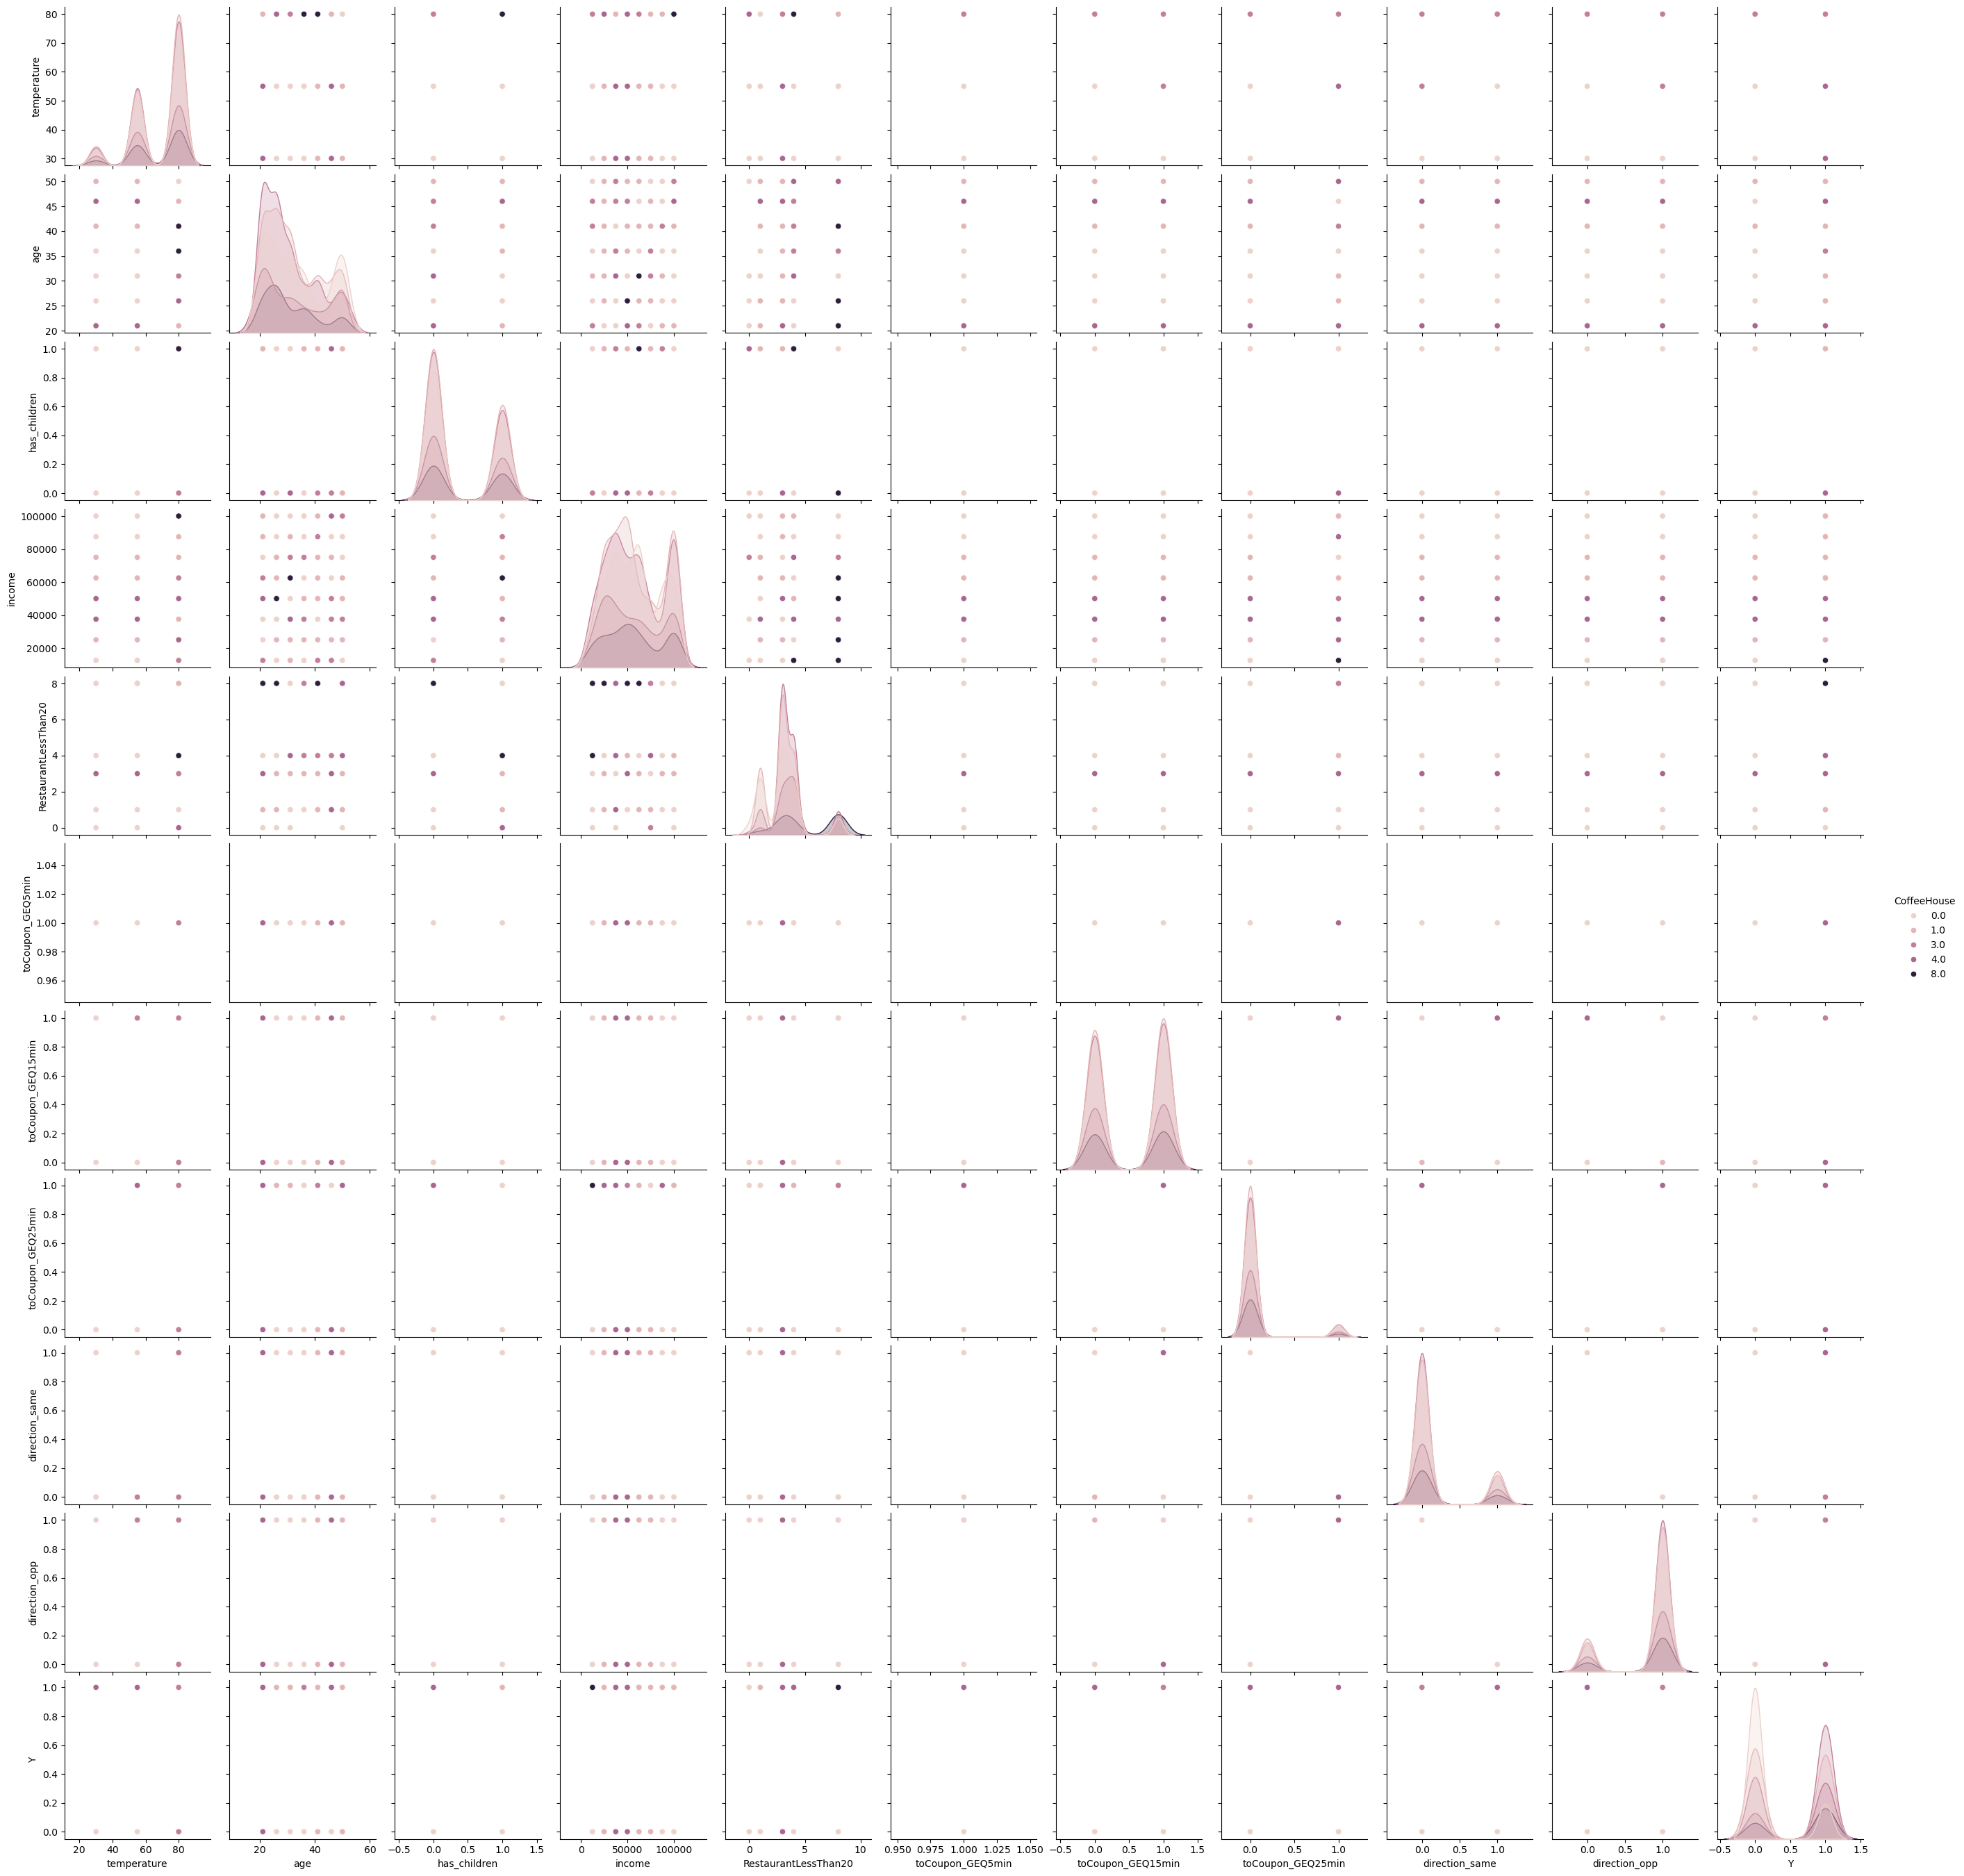

In [326]:
sns.pairplot (coffeehouse_coupons, hue='CoffeeHouse')

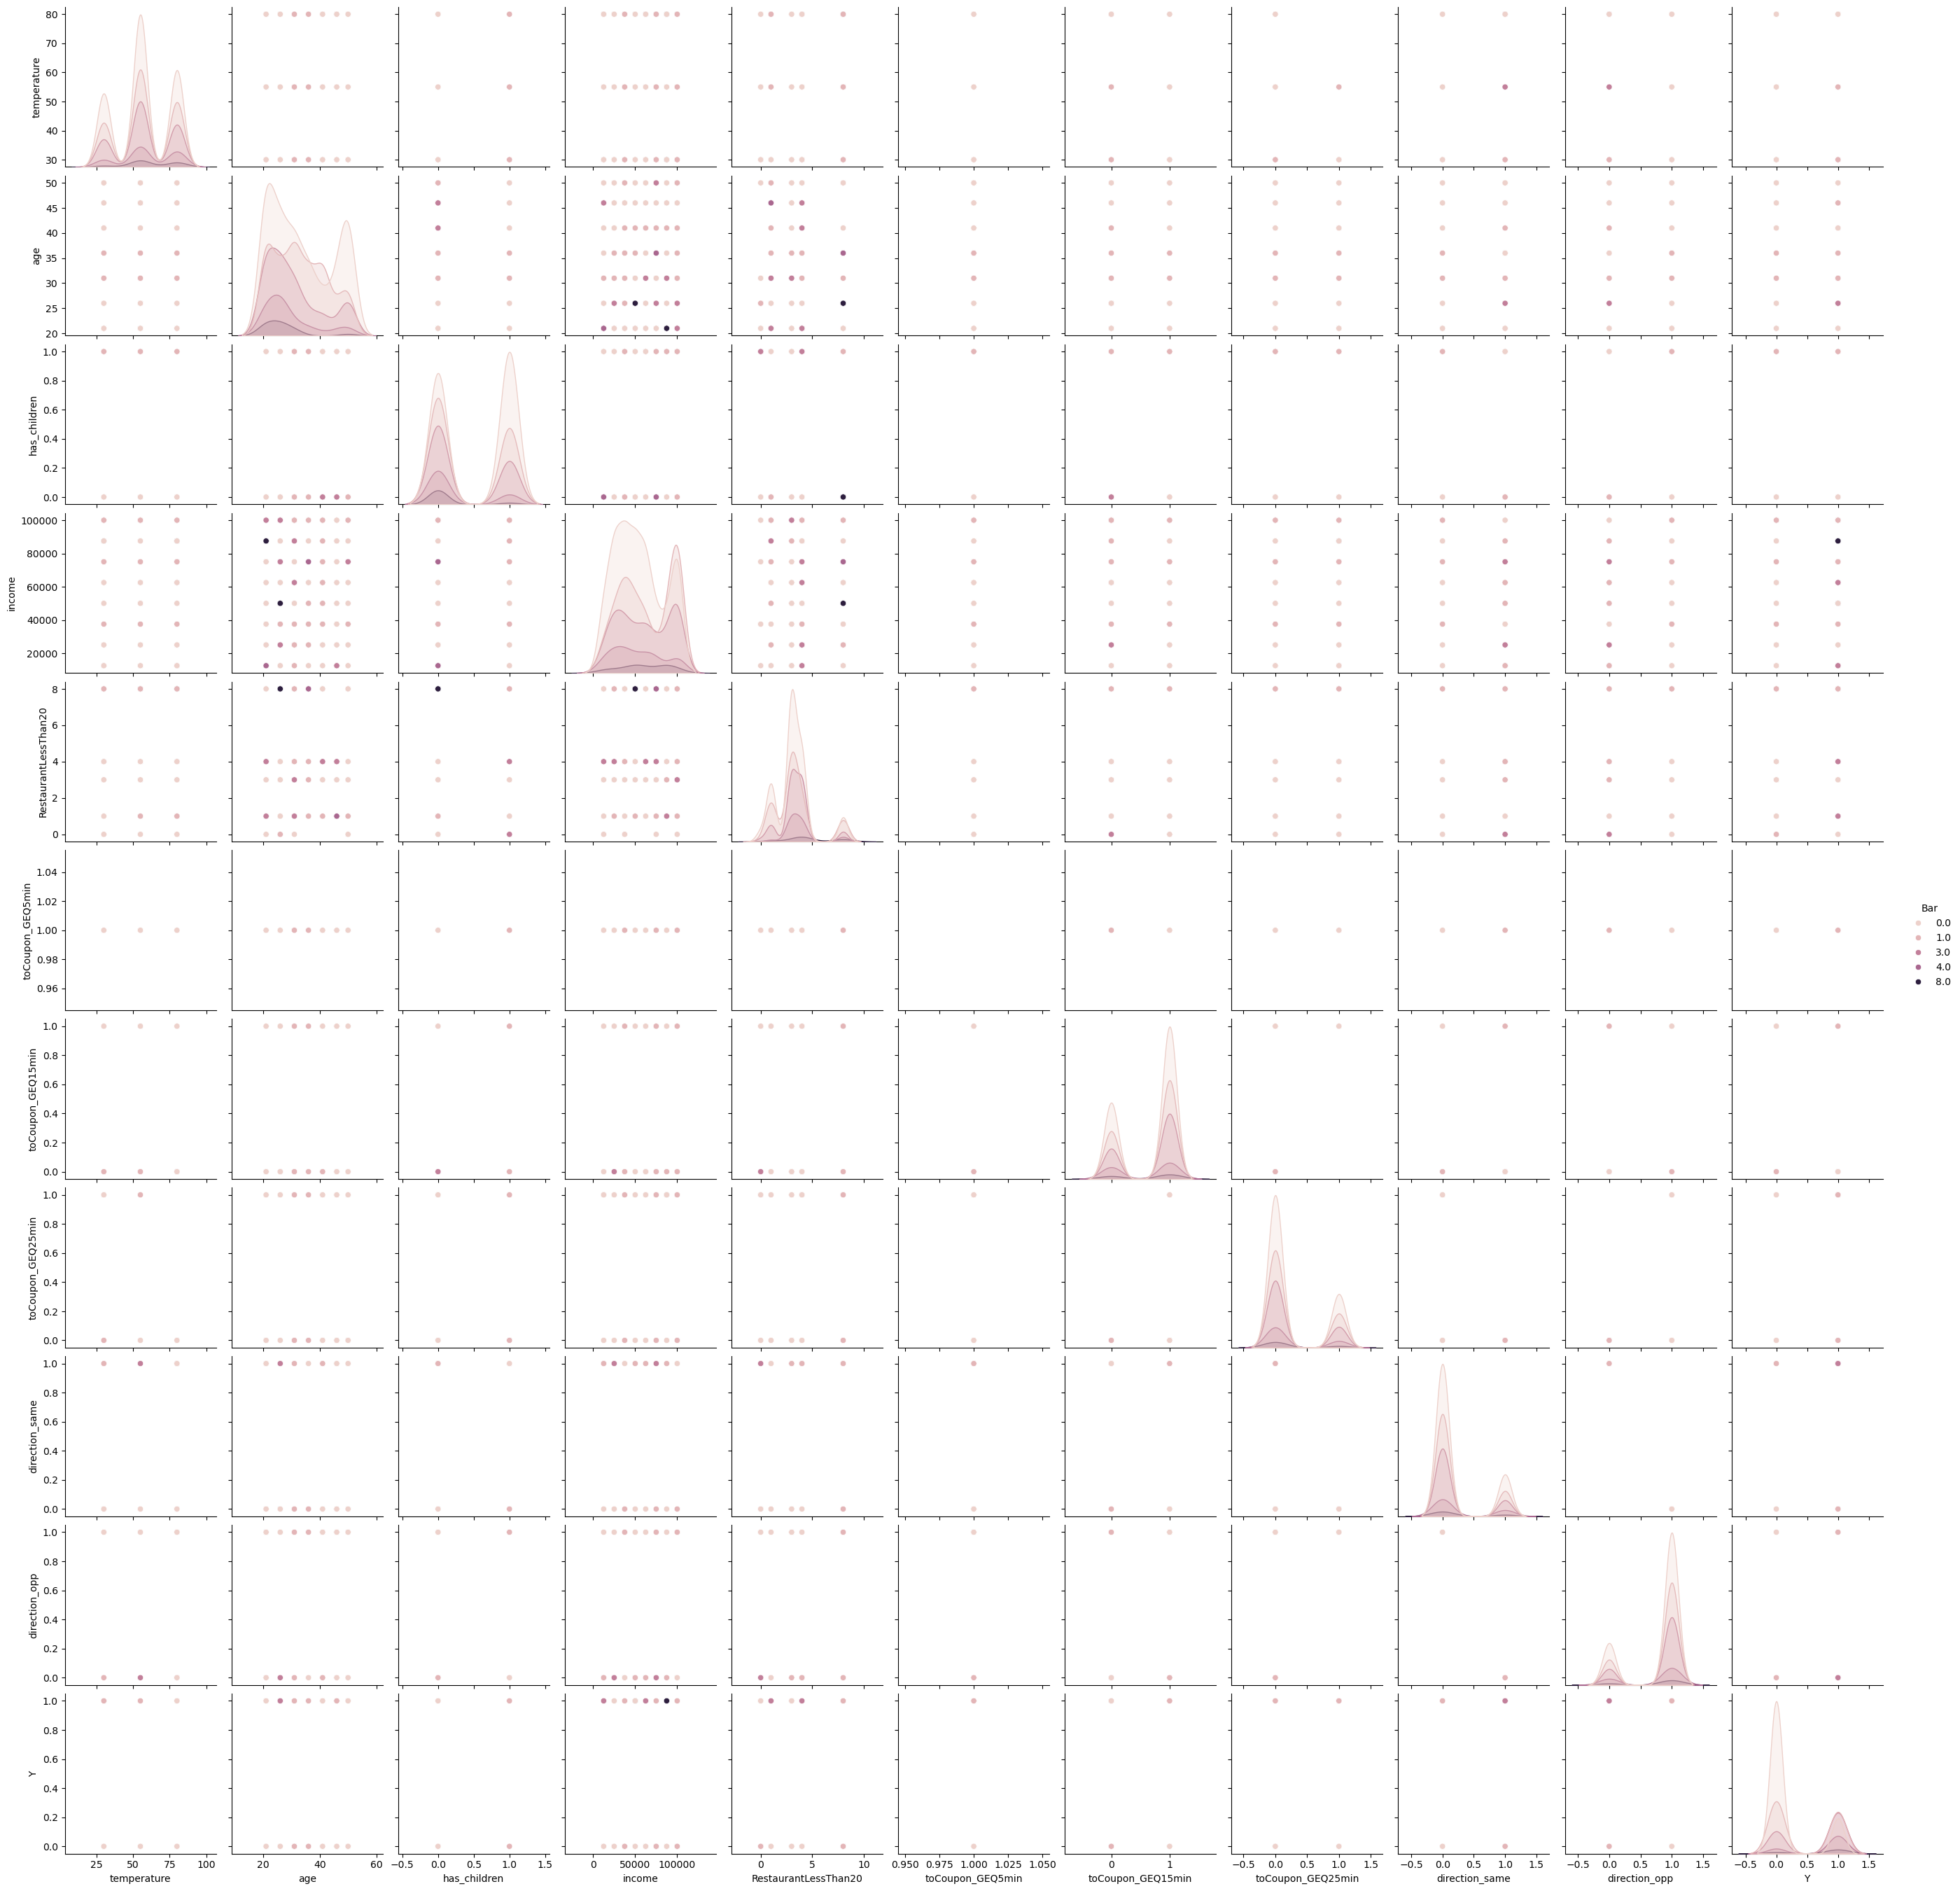

In [328]:
sns.pairplot (bar_coupons, hue='Bar')